# This Script is implemented for Sequential Processing

## Importing Libraries 📚

In [1]:
# !pip install tashaphyne

  Using cached Tashaphyne-0.3.6-py3-none-any.whl.metadata (18 kB)
  Using cached PyArabic-0.6.15-py3-none-any.whl.metadata (10 kB)
Using cached Tashaphyne-0.3.6-py3-none-any.whl (251 kB)
Using cached PyArabic-0.6.15-py3-none-any.whl (126 kB)


In [2]:
import time
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize
from nltk import ngrams
from tashaphyne.stemming import ArabicLightStemmer

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

In [3]:
Beginning = time.time()
start = time.time()
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

end = time.time()
times = []
times.append(["Download", end-start])
print("✅ Finished")

✅ Finished


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Studying and Processing Data 🔍 & 🛠️

Data loaded successfully. Number of reviews: 10000
Class distribution:
 label
0    5121
1    4879
Name: count, dtype: int64
Visualizing class distribution...


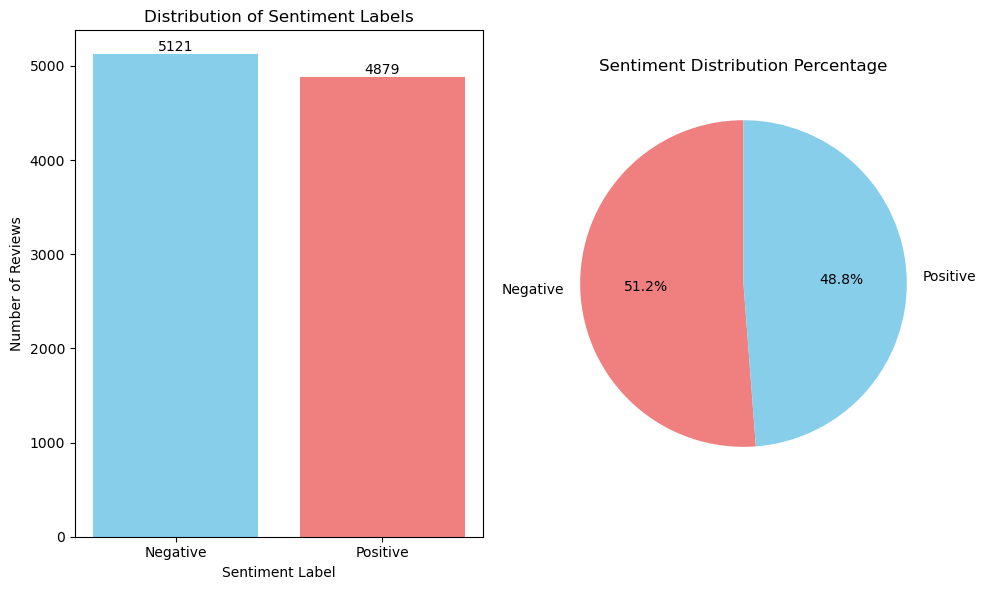

Total reviews: 10000
Positive reviews: 4879 (48.8%)
Negative reviews: 5121 (51.2%)


In [4]:
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv('arabic_sentiment_reviews.csv', encoding='utf-8')
required_length = 10000
data = data[0:required_length]

print("Data loaded successfully. Number of reviews:", len(data))
print("Class distribution:\n", data['label'].value_counts())


print("Visualizing class distribution...")
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
class_counts = data['label'].value_counts()
bars = plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=['Negative', 'Positive'], autopct='%1.1f%%', 
        colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Sentiment Distribution Percentage')

plt.tight_layout()
plt.show()

# Display basic statistics
print(f"Total reviews: {len(data)}")
print(f"Positive reviews: {class_counts[1]} ({class_counts[1]/len(data)*100:.1f}%)")
print(f"Negative reviews: {class_counts[0]} ({class_counts[0]/len(data)*100:.1f}%)")

In [5]:
data.head()

,label,content
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دافئة ومريحة وبأسعار معقولة لجودة رائعة.زوجي وأنا عل...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من النعال الباو الدب.باتباع إرشادات وصف المنتج ، ارتفعت ...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط قطع صغيرة من المجوهرات ، ولكن الذهاب ببطء.إنه مفي...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، كن حذرًا جدًا للغاية مع إطالة وتقصيره ، وأي استخدا...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين يحبون الضحك: عليك فقط أن تبتسم عندما تستمع إلى Boo...


In [6]:
## We will filter each row if English percentage is greater than arabic

print("\nStarting English Content Filtering...")
start = time.time()
english_threshold = 0.5

data['total_char_count'] = data['content'].astype(str).apply(lambda x: len(re.sub(r'[^a-zA-Z\u0621-\u064A]', '', x)))

data['english_char_count'] = data['content'].astype(str).apply(lambda x: len(re.sub(r'[^a-zA-Z]', '', x)))

data['english_percentage'] = np.where(data['total_char_count'] > 0,
                                     data['english_char_count'] / data['total_char_count'], 0)



data = data.drop(columns=['total_char_count', 'english_char_count']) # Clean up temporary columns

end = time.time()
times.append(["English Filtering", end-start])
print(f"✅ Finished.")


Starting English Content Filtering...
✅ Finished.


Analyzing text length distribution...


C:\Users\Saad\AppData\Local\Temp\ipykernel_18316\1413236781.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=data, palette=['lightcoral', 'skyblue'])


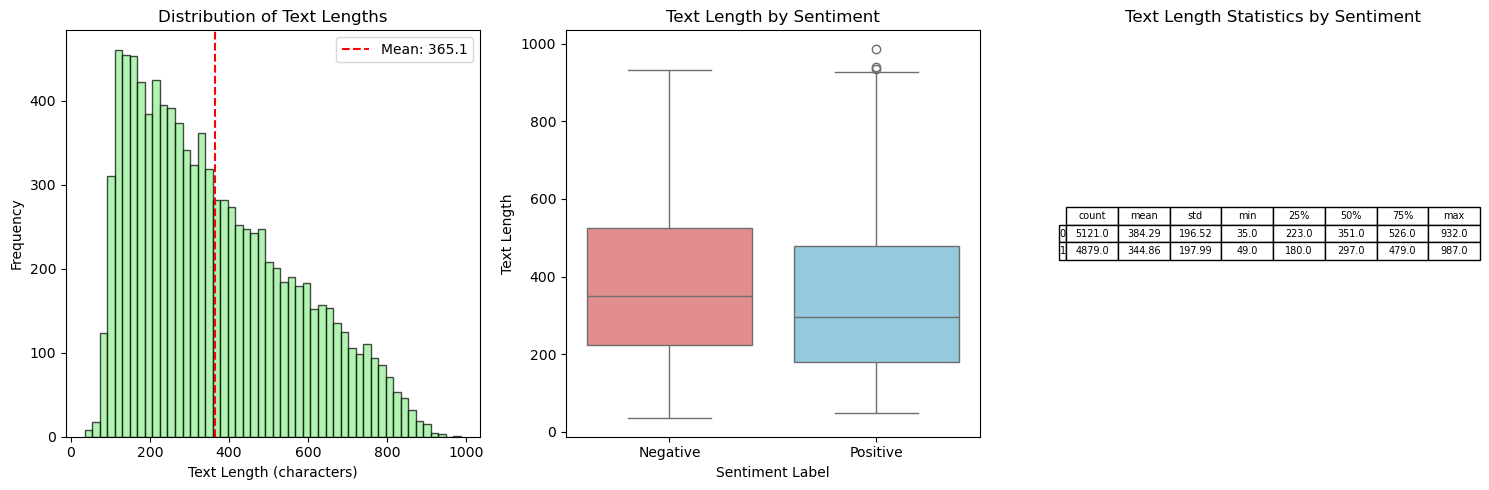

In [7]:
print("Analyzing text length distribution...")
data['text_length'] = data['content'].apply(lambda x: len(str(x)))

plt.figure(figsize=(15, 5))

# Text length distribution
plt.subplot(1, 3, 1)
plt.hist(data['text_length'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.axvline(data['text_length'].mean(), color='red', linestyle='--', 
            label=f'Mean: {data["text_length"].mean():.1f}')
plt.legend()

# Text length by sentiment
plt.subplot(1, 3, 2)
sns.boxplot(x='label', y='text_length', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Text Length')
plt.xticks([0, 1], ['Negative', 'Positive'])

# Text length statistics
plt.subplot(1, 3, 3)
length_stats = data.groupby('label')['text_length'].describe()
plt.table(cellText=length_stats.round(2).values,
          rowLabels=length_stats.index,
          colLabels=length_stats.columns,
          cellLoc='center', loc='center')
plt.title('Text Length Statistics by Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

# Clean up temporary column
data = data.drop('text_length', axis=1)

In [8]:
# Compile all patterns once globally
non_arabic_pattern = re.compile(r'[^\u0621-\u064A\s]')
alif_pattern = re.compile(r'[أإآ]')
ya_pattern = re.compile(r'ى')
ta_marbuta_pattern = re.compile(r'ة')
diacritics_pattern = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
tatweel_pattern = re.compile(r'ـ')

def preprocess_text(text):
    text = diacritics_pattern.sub('', text)      
    text = tatweel_pattern.sub('', text)       
    text = non_arabic_pattern.sub(' ', text)    
    text = alif_pattern.sub('ا', text)           
    text = ya_pattern.sub('ي', text)        
    text = ta_marbuta_pattern.sub('ه', text)    
    
    return text.strip()

print("Cleaning and normalizing text...")
start = time.time()
data['cleaned_content'] = data['content'].apply(preprocess_text)
end = time.time()
times.append(["Normalizing", end-start])
print("✅ Finished")

Cleaning and normalizing text...
✅ Finished


In [9]:
print("Tokenizing and removing stop words...")
start = time.time()
arabic_stopwords = set(stopwords.words('arabic'))
data['tokenized_content'] = data['cleaned_content'].apply(word_tokenize)
data['filtered_content'] = data['tokenized_content'].apply(lambda tokens: [word for word in tokens if word not in arabic_stopwords])
end = time.time()
times.append(["Tokenizing and removing stop words", end-start])
print("✅ Finished")

Tokenizing and removing stop words...
✅ Finished


In [10]:
print("Lemmatizing...")
start = time.time()
lemmatizer = ArabicLightStemmer()
data['lemmatized_content'] = data['filtered_content'].apply(lambda tokens: [lemmatizer.light_stem(word) for word in tokens])
end = time.time()
times.append(["Lemmatizing", end-start])
print("✅ Finished")

Lemmatizing...
✅ Finished


Analyzing word frequencies...


C:\Users\Saad\AppData\Local\Temp\ipykernel_18316\2707073641.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')


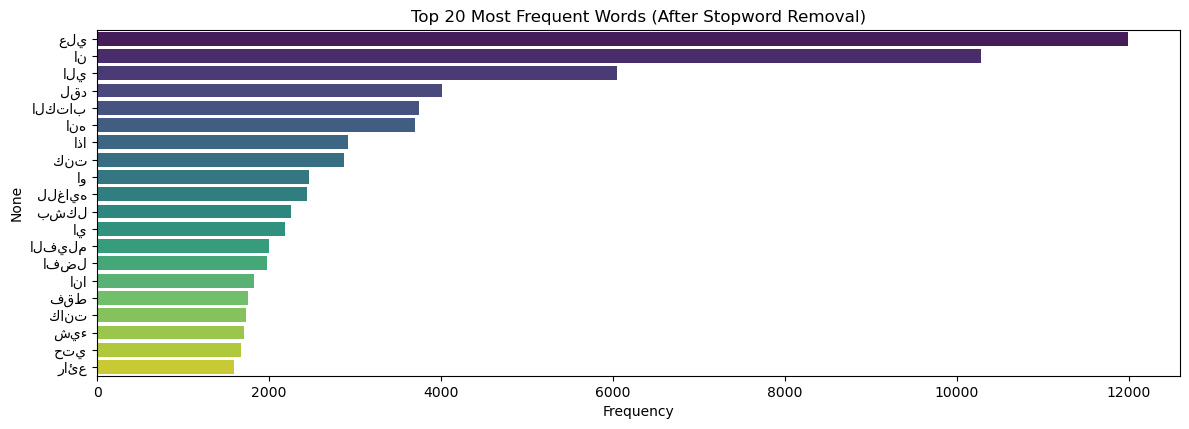

Total unique words: 45269
Total words: 481670


In [11]:
print("Analyzing word frequencies...")

# Combine all tokens
all_tokens = [token for tokens in data['filtered_content'] for token in tokens]
all_tokens_series = pd.Series(all_tokens)

# Get top 20 most common words
top_words = all_tokens_series.value_counts().head(20)

plt.figure(figsize=(12, 8))

# Horizontal bar plot for top words
plt.subplot(2, 1, 1)
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title('Top 20 Most Frequent Words (After Stopword Removal)')
plt.xlabel('Frequency')



plt.tight_layout()
plt.show()

print(f"Total unique words: {len(all_tokens_series.unique())}")
print(f"Total words: {len(all_tokens)}")

In [12]:
def generate_ngrams(tokens, n):
    return ['_'.join(gram) for gram in ngrams(tokens, n)]

print("\n Generating n-grams (2, 3, 4)...")
start = time.time()
data['bigrams'] = data['lemmatized_content'].apply(lambda t: generate_ngrams(t, 2))
data['trigrams'] = data['lemmatized_content'].apply(lambda t: generate_ngrams(t, 3))
data['fourgrams'] = data['lemmatized_content'].apply(lambda t: generate_ngrams(t, 4))
end = time.time()
times.append(["N-gram generation", end-start])
print("✅ Finished")


 Generating n-grams (2, 3, 4)...
✅ Finished


Analyzing n-grams...


C:\Users\Saad\AppData\Local\Temp\ipykernel_18316\2157602364.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bigrams.values, y=top_bigrams.index, ax=axes[0], palette='Blues_r')
C:\Users\Saad\AppData\Local\Temp\ipykernel_18316\2157602364.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trigrams.values, y=top_trigrams.index, ax=axes[1], palette='Greens_r')
C:\Users\Saad\AppData\Local\Temp\ipykernel_18316\2157602364.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fourgrams.values, y=top_fourgrams.index, ax=axes[2]

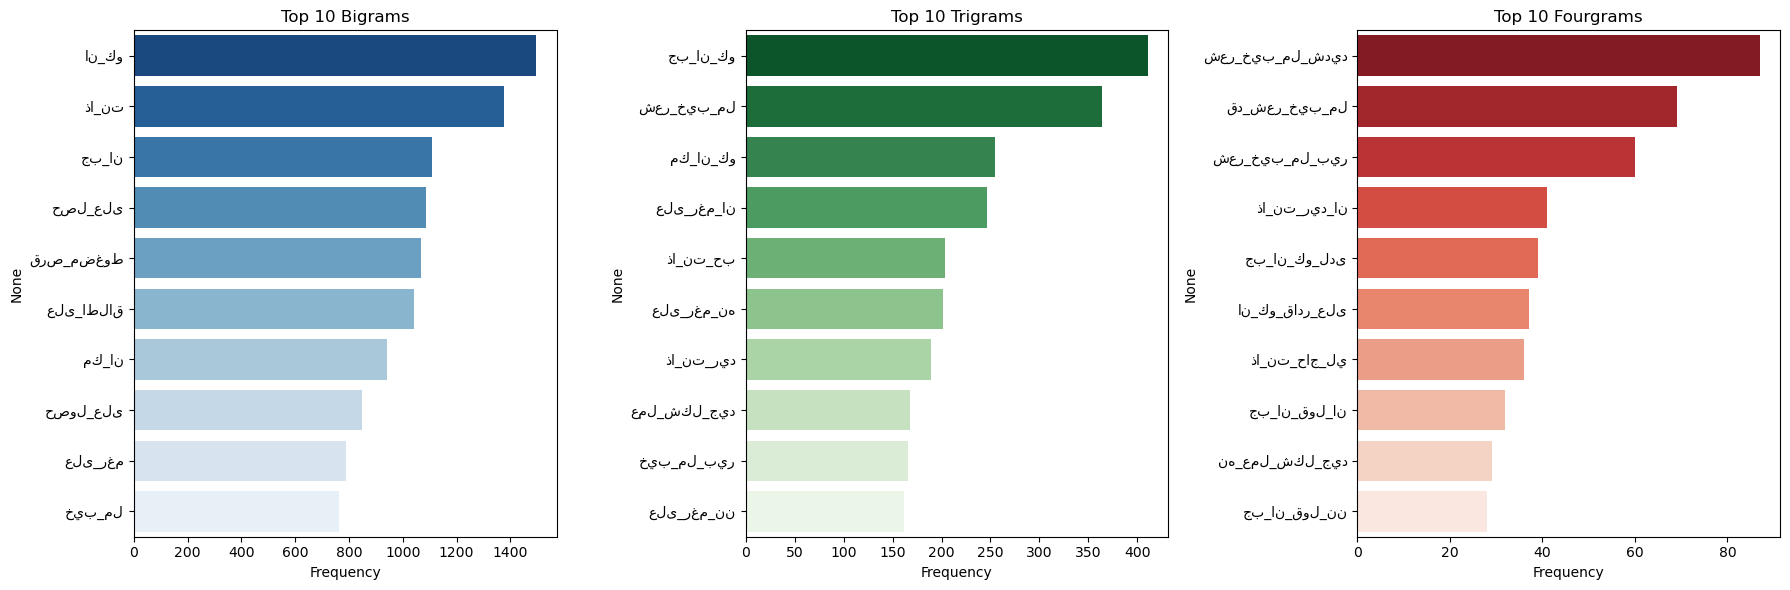

In [13]:
print("Analyzing n-grams...")

# Function to get top n-grams
def get_top_ngrams(ngram_series, n=10):
    all_ngrams = [ngram for ngrams_list in ngram_series for ngram in ngrams_list]
    return pd.Series(all_ngrams).value_counts().head(n)

# Get top n-grams for each type
top_bigrams = get_top_ngrams(data['bigrams'])
top_trigrams = get_top_ngrams(data['trigrams'])
top_fourgrams = get_top_ngrams(data['fourgrams'])

# Plot n-grams
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bigrams
sns.barplot(x=top_bigrams.values, y=top_bigrams.index, ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Bigrams')
axes[0].set_xlabel('Frequency')

# Trigrams
sns.barplot(x=top_trigrams.values, y=top_trigrams.index, ax=axes[1], palette='Greens_r')
axes[1].set_title('Top 10 Trigrams')
axes[1].set_xlabel('Frequency')

# Fourgrams
sns.barplot(x=top_fourgrams.values, y=top_fourgrams.index, ax=axes[2], palette='Reds_r')
axes[2].set_title('Top 10 Fourgrams')
axes[2].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
data.head(3)

,label,content,english_percentage,cleaned_content,tokenized_content,filtered_content,lemmatized_content,bigrams,trigrams,fourgrams
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دافئة ومريحة وبأسعار معقولة لجودة رائعة.زوجي وأنا عل...,0.000000,النعال المريحه ارتدي هذه النعال كثيرا فهي دافئه ومريحه وباسعار معقوله لجوده رائعه زوجي وانا علي...,"[النعال, المريحه, ارتدي, هذه, النعال, كثيرا, فهي, دافئه, ومريحه, وباسعار, معقوله, لجوده, رائعه, ...","[النعال, المريحه, ارتدي, النعال, فهي, دافئه, ومريحه, وباسعار, معقوله, لجوده, رائعه, زوجي, وانا, ...","[نعال, مريحه, رتد, نعال, هي, دافئ, مريح, اسعار, معقول, جود, رائع, زوج, نا, على, حد, سواء, لدى, ز...","[نعال_مريحه, مريحه_رتد, رتد_نعال, نعال_هي, هي_دافئ, دافئ_مريح, مريح_اسعار, اسعار_معقول, معقول_جو...","[نعال_مريحه_رتد, مريحه_رتد_نعال, رتد_نعال_هي, نعال_هي_دافئ, هي_دافئ_مريح, دافئ_مريح_اسعار, مريح_...","[نعال_مريحه_رتد_نعال, مريحه_رتد_نعال_هي, رتد_نعال_هي_دافئ, نعال_هي_دافئ_مريح, هي_دافئ_مريح_اسعار..."
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من النعال الباو الدب.باتباع إرشادات وصف المنتج ، ارتفعت ...,0.028249,منتج جميل خدمه سيئه لقد اشتريت زوجا من النعال الباو الدب باتباع ارشادات وصف المنتج ارتفعت ح...,"[منتج, جميل, خدمه, سيئه, لقد, اشتريت, زوجا, من, النعال, الباو, الدب, باتباع, ارشادات, وصف, المنت...","[منتج, جميل, خدمه, سيئه, لقد, اشتريت, زوجا, النعال, الباو, الدب, باتباع, ارشادات, وصف, المنتج, ا...","[منتج, جميل, خدم, ئه, قد, اشتري, زوج, نعال, باو, دب, اتباع, ارشاد, صف, منتج, ارتفع, حجم, تناسب, ...","[منتج_جميل, جميل_خدم, خدم_ئه, ئه_قد, قد_اشتري, اشتري_زوج, زوج_نعال, نعال_باو, باو_دب, دب_اتباع, ...","[منتج_جميل_خدم, جميل_خدم_ئه, خدم_ئه_قد, ئه_قد_اشتري, قد_اشتري_زوج, اشتري_زوج_نعال, زوج_نعال_باو,...","[منتج_جميل_خدم_ئه, جميل_خدم_ئه_قد, خدم_ئه_قد_اشتري, ئه_قد_اشتري_زوج, قد_اشتري_زوج_نعال, اشتري_زو..."
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط قطع صغيرة من المجوهرات ، ولكن الذهاب ببطء.إنه مفي...,0.000000,جيد للاشياء الصغيره هذا يعمل بشكل جيد لالتقاط قطع صغيره من المجوهرات ولكن الذهاب ببطء انه مفي...,"[جيد, للاشياء, الصغيره, هذا, يعمل, بشكل, جيد, لالتقاط, قطع, صغيره, من, المجوهرات, ولكن, الذهاب, ...","[جيد, للاشياء, الصغيره, يعمل, بشكل, جيد, لالتقاط, قطع, صغيره, المجوهرات, الذهاب, ببطء, انه, مفيد...","[جيد, اشياء, صغيره, عمل, شكل, جيد, التقاط, قطع, صغير, مجوهر, ذهاب, بطء, نه, مفيد, مغناطيس, قوي, جد]","[جيد_اشياء, اشياء_صغيره, صغيره_عمل, عمل_شكل, شكل_جيد, جيد_التقاط, التقاط_قطع, قطع_صغير, صغير_مجو...","[جيد_اشياء_صغيره, اشياء_صغيره_عمل, صغيره_عمل_شكل, عمل_شكل_جيد, شكل_جيد_التقاط, جيد_التقاط_قطع, ا...","[جيد_اشياء_صغيره_عمل, اشياء_صغيره_عمل_شكل, صغيره_عمل_شكل_جيد, عمل_شكل_جيد_التقاط, شكل_جيد_التقاط..."


In [15]:
Final = time.time()
times.append(["Overall", Final - Beginning])

print("Times for Sequential Processing")
for i in times:
    print(f"⏱️ {i[0]} : {i[1]:.4} seconds")

Times for Sequential Processing
⏱️ Download : 1.812 seconds
⏱️ English Filtering : 0.3799 seconds
⏱️ Normalizing : 0.1753 seconds
⏱️ Tokenizing and removing stop words : 1.41 seconds
⏱️ Lemmatizing : 13.49 seconds
⏱️ N-gram generation : 0.411 seconds
⏱️ Overall : 21.99 seconds


Visualizing processing times...


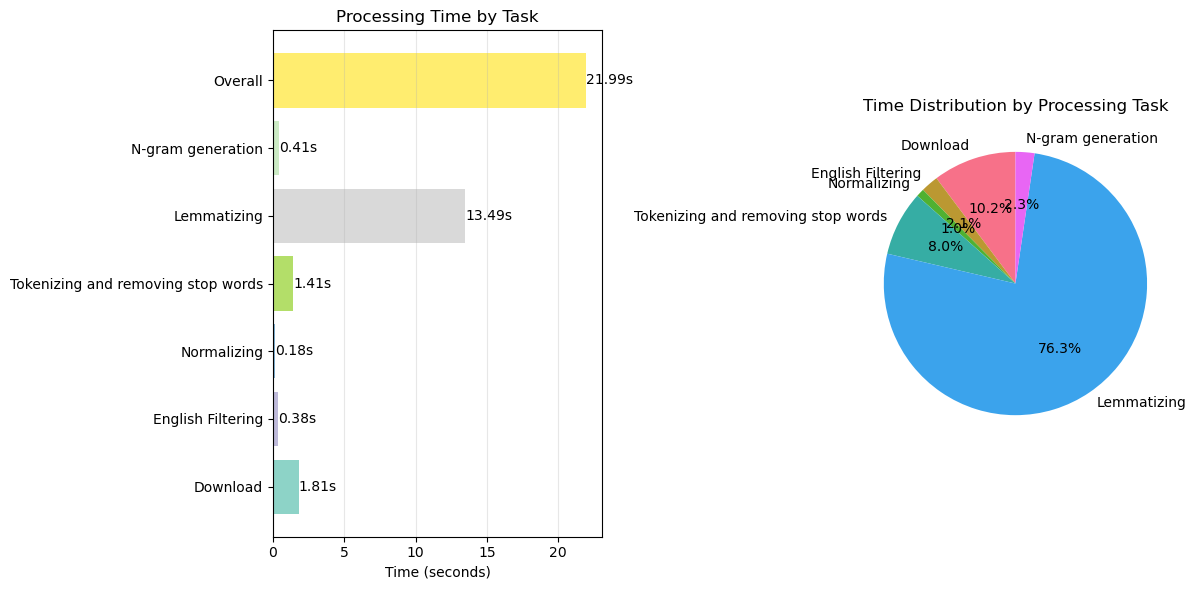

\n📊 Performance Summary:
Total processing time: 21.99 seconds
Average time per task: 2.95 seconds
Slowest task: Overall (21.99 seconds)
Fastest task: Normalizing (0.18 seconds)
\n📈 Data Quality Metrics:
Final dataset size: 10000 reviews
Columns in final dataset: ['label', 'content', 'english_percentage', 'cleaned_content', 'tokenized_content', 'filtered_content', 'lemmatized_content', 'bigrams', 'trigrams', 'fourgrams']
Missing values in content: 0
Missing values in cleaned_content: 0


In [16]:
print("Visualizing processing times...")

# Extract timing data
tasks = [item[0] for item in times]
durations = [item[1] for item in times]

plt.figure(figsize=(12, 6))

# Bar chart of processing times
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(tasks)))
bars = plt.barh(tasks, durations, color=colors)
plt.xlabel('Time (seconds)')
plt.title('Processing Time by Task')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2., 
             f'{width:.2f}s', ha='left', va='center')

# Pie chart of time distribution (excluding overall)
plt.subplot(1, 2, 2)
task_times = durations[:-1]  # Exclude overall time
task_names = tasks[:-1]
plt.pie(task_times, labels=task_names, autopct='%1.1f%%', startangle=90)
plt.title('Time Distribution by Processing Task')

plt.tight_layout()
plt.show()

# Summary statistics
total_time = times[-1][1]
print(f"\\n📊 Performance Summary:")
print(f"Total processing time: {total_time:.2f} seconds")
print(f"Average time per task: {np.mean(durations[:-1]):.2f} seconds")
print(f"Slowest task: {tasks[np.argmax(durations)]} ({max(durations):.2f} seconds)")
print(f"Fastest task: {tasks[np.argmin(durations[:-1])]} ({min(durations[:-1]):.2f} seconds)")

# Data quality metrics
print(f"\\n📈 Data Quality Metrics:")
print(f"Final dataset size: {len(data)} reviews")
print(f"Columns in final dataset: {list(data.columns)}")
print(f"Missing values in content: {data['content'].isnull().sum()}")
print(f"Missing values in cleaned_content: {data['cleaned_content'].isnull().sum()}")

# Saving results

In [17]:
data = data.drop(['content', 'cleaned_content', 'tokenized_content', 'filtered_content'], axis = 1)
data.to_csv("./arabic_reviews_sequential_clean.csv", index=False, encoding="utf-8")